In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def readDataToList(fliepath):
    score=[]
    reward=[]
    with open(fliepath,'r') as f:
        for line in f:
            a,b=line.split(',')
            score.append(int(a))
            reward.append(float(b))
    return score,reward

In [4]:
def moving_average(data,window_len):
    sum=0
    n=len(data)
    ret=[]
    for i in range(window_len-1):
        sum+=data[i]
    for i in range(window_len-1,n):
        sum+=data[i]
        ret.append(sum/window_len)
        sum-=data[i-window_len+1]
    return ret

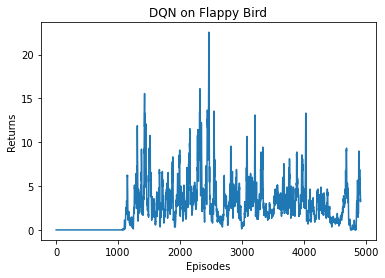

In [6]:
dqn_type="DQN"
lr=0.001
gamma=0.98
episodes=80000
target_update=25
batch_size=32
score,reward=readDataToList(f'./log/log_train_{dqn_type}_lr{lr}_gamma{gamma}_episodes{episodes}_targetupdate{target_update}_bats_{batch_size}.txt')
ret_list=moving_average(score,9)
episode_list=list(range(len(ret_list)))
plt.plot(episode_list, ret_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('{} on {}'.format(f'{dqn_type}','Flappy Bird'))
plt.show()